In [1]:
import sympy as sp
from sympy import Matrix
import numpy as np
import matplotlib.pyplot as plt
from sympy.solvers import solve
from sympy import re, im, I, E , Abs
from sympy import Product, oo
from tqdm.notebook import tqdm

In [2]:
def forward_difference(x , y):
    dydx = np.array(len(x)*[0.00])
    for i in range(len(x)-1):
        dydx[i] = (y[i+1] - y[i])/(x[i+1] - x[i])
    
    dydx[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])
    
    return dydx

In [3]:
k = sp.Symbol('k')
t = sp.Symbol('t')
vi = sp.Symbol(r'$v_i$')
vf = sp.Symbol(r'$v_f$')
wi = sp.Symbol(r'$w_i$')
wf = sp.Symbol(r'$w_f$')
cos_delta_k = sp.Symbol(r'd^{i}d^{f}')
pi = sp.pi

In [4]:
vi = 1
wi = 1.5

vf = 1.5
wf = 1

In [5]:
di = Matrix([vi + wi*sp.cos(k) , -wi*sp.sin(k)])

df = Matrix([vf + wf*sp.cos(k) , -wf*sp.sin(k)])

In [6]:
di_normed = (1/(vi**2 + wi**2 + 2*vi*wi*sp.cos(k)))*di

df_normed = (1/(vf**2 + wf**2 + 2*vf*wf*sp.cos(k)))*df

In [7]:
cos_delta_k = di.dot(df)

Eik = sp.sqrt(vi**2 + wi**2 + 2*vi*wi*sp.cos(k))

Efk = sp.sqrt(vf**2 + wf**2 + 2*vf*wf*sp.cos(k))

In [8]:
kc = solve(cos_delta_k , k)
tc = pi/(2*Efk.subs(k,kc[1]))

In [9]:
Gk = sp.cos(Efk*t) - I*cos_delta_k*sp.sin(Efk*t)

In [10]:
LE_amp = Product(Gk , (k , -pi , pi))
rate = re(sp.log(Abs(LE_amp)**2))   

In [11]:
phi_dyn = sp.arg(sp.cos(-Efk*t*cos_delta_k) + I*sp.sin(-Efk*t*cos_delta_k))

In [12]:
PGP = sp.arg(    sp.cos(sp.arg(Gk) - phi_dyn) + I*sp.sin(sp.arg(Gk) - phi_dyn)   )

In [13]:
lam_PGP = sp.lambdify([t , k] , PGP)

In [14]:
PGP

arg(-I*sin(arg(-I*sin(1.80277563773199*t*((cos(k) + 1.5)*(1.5*cos(k) + 1) + 1.5*sin(k)**2)*sqrt(0.923076923076923*cos(k) + 1)) + cos(1.80277563773199*t*((cos(k) + 1.5)*(1.5*cos(k) + 1) + 1.5*sin(k)**2)*sqrt(0.923076923076923*cos(k) + 1))) - arg(-I*((cos(k) + 1.5)*(1.5*cos(k) + 1) + 1.5*sin(k)**2)*sin(1.80277563773199*t*sqrt(0.923076923076923*cos(k) + 1)) + cos(1.80277563773199*t*sqrt(0.923076923076923*cos(k) + 1)))) + cos(arg(-I*sin(1.80277563773199*t*((cos(k) + 1.5)*(1.5*cos(k) + 1) + 1.5*sin(k)**2)*sqrt(0.923076923076923*cos(k) + 1)) + cos(1.80277563773199*t*((cos(k) + 1.5)*(1.5*cos(k) + 1) + 1.5*sin(k)**2)*sqrt(0.923076923076923*cos(k) + 1))) - arg(-I*((cos(k) + 1.5)*(1.5*cos(k) + 1) + 1.5*sin(k)**2)*sin(1.80277563773199*t*sqrt(0.923076923076923*cos(k) + 1)) + cos(1.80277563773199*t*sqrt(0.923076923076923*cos(k) + 1)))))

In [31]:
k_vals = np.linspace(0 , np.pi , 1001)
dk = k_vals[1] - k_vals[0]
t_vals = np.linspace(0,30,1000)

PGP_num = np.zeros((len(t_vals) , len(k_vals)))

In [32]:
for t_index in tqdm(range(len(t_vals))):
    for k_index in range(len(k_vals)):
        PGP_num[t_index , k_index] = lam_PGP(t_vals[t_index] , k_vals[k_index])

  0%|          | 0/1000 [00:00<?, ?it/s]

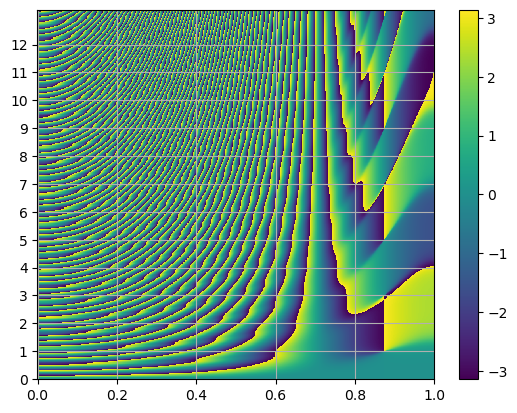

In [33]:
plt.pcolormesh(k_vals/np.pi , t_vals/float(tc) , PGP_num)
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12])
plt.grid()
plt.colorbar()

In [34]:
dnu_num = np.zeros((len(t_vals) , len(k_vals)))
nu_num = (len(t_vals)*[0.00])
# d_dk = FinDiff(0,dk)

# for i in range(len(t)):
#     dnu[i] = d_dk(PGP[i])

for i in tqdm(range(len(t_vals))):
    dnu_num[i] = forward_difference(k_vals , PGP_num[i])

  0%|          | 0/1000 [00:00<?, ?it/s]

In [35]:
for i in tqdm(range(len(t_vals))):
    nu_num[i] = np.trapz(dnu_num[i,:] , dx = dk)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [36]:
max(PGP_num[100])

3.131469587858364

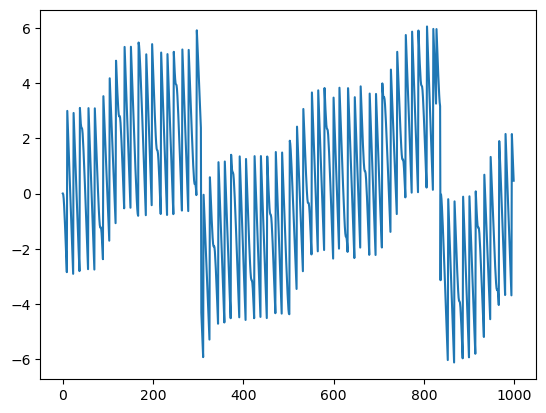

In [37]:
plt.plot(nu_num)

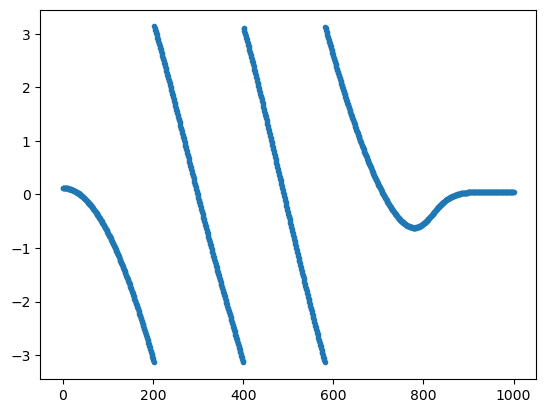

In [44]:
plt.plot(PGP_num[50] , ".")

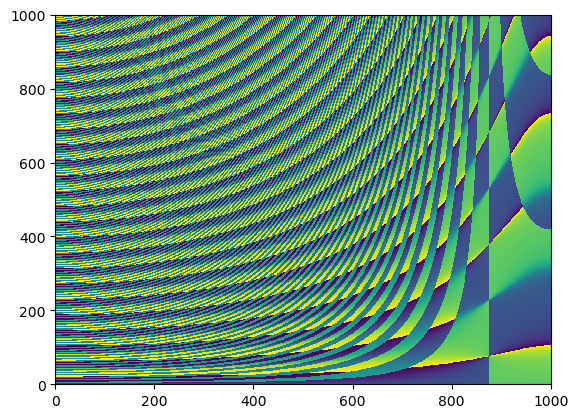

In [45]:
plt.pcolormesh(PGP_num)

In [46]:
PGP_num[200]

array([-0.1903669 , -0.19036065, -0.19034191, ..., -1.60555372,
       -1.60562829, -1.60565316])

In [46]:
dnu = sp.diff(PGP , k)

In [48]:
nu = sp.integrate(dnu , (k , 0 , pi))


KeyboardInterrupt



In [20]:
#dnu = sp.diff(PGP , k)

In [61]:
float(tc)

2.2654346798277962

In [27]:
#lam_dnu = sp.lambdify([t , k] , dnu)

In [28]:
#k_vals = np.linspace(0 , np.pi , 1001)
#t_vals = np.linspace(0,10,1000)

In [31]:
#dnu_vals = lam_dnu(0 , 0)

In [57]:
#sp.simplify(dnu)